# Assignment 5: Matrix as a Linear Transformation
## DTSC 680: Applied Machine Learning

## Name: Nash Lawrence

The purpose of this assignment is for you to gain experience working with matrices and vectors, as well as to understand the idea that a matrix can be viewed as a ___linear transformation___.  This requires us to think of a matrix $\mathbf{A}$ as an object that "acts" (or "operates") on a vector $\mathbf{x}$ by multiplication to produce a new vector called $\mathbf{Ax}$.  The original vector is $\mathbf{x}$, and the transformed vector is $\mathbf{Ax}$.  In this assignment you will transform an ensemble of vectors using several different matrices (i.e. several different transformations) and observe the results.

Before you continue, take a look at this video from 3Blue1Brown: [Linear transformations and matrices](https://youtu.be/kYB8IZa5AuE)

In Assignment 4, you computed matrix-vector multiplications by hand for just a single vector - that is, you computed $\mathbf{b}$ as $\mathbf{Ax} = \mathbf{b}$ manually.  For instance, you might have computed the following by hand:


$$
\begin{bmatrix} 4 & -3 & 1 & 3 \\ 2 & 0 & 5 & 1 \end{bmatrix} \times \left[ \begin{array}{c} 1 \\ 1 \\ 1 \\ 1 \end{array} \right] = \left[ \begin{array}{c} 5 \\ 8 \end{array} \right]
$$


$$
\begin{bmatrix} 4 & -3 & 1 & 3 \\ 2 & 0 & 5 & 1 \end{bmatrix} \times \left[ \begin{array}{c} 1 \\ 4 \\ -1 \\ 3 \end{array} \right] = \left[ \begin{array}{c} 0 \\ 0 \end{array} \right]
$$

These equations say that multiplication by the matrix $\mathbf{A}$ transforms the vector $\left[ \begin{array}{c} 1 & 1 & 1 & 1 \end{array} \right]^T$ into $\left[ \begin{array}{c} 5 & 8 \end{array} \right]^T$ and transforms the vector $\left[ \begin{array}{c} 1 & 4 & -1 & 3 \end{array} \right]^T$ into $\left[ \begin{array}{c} 0 & 0 \end{array} \right]^T$.  (Note: The superscript `T` denotes the transpose, which essentially means "the rows become columns, and the columns become rows".)

Suppose that we wanted to perform this transformation not for just one vector (i.e. one single data point), but for many vectors (i.e. many data points) at the same time.  We could accomplish this by thinking of our vector now as a matrix of vectors, and we will apply the linear transformation to each of these vectors in the matrix. (So, now we will be performing matrix multiplication.) For example, to apply the linear transformation to the above two vectors at the same time, we would write:

$$
\begin{bmatrix} 4 & -3 & 1 & 3 \\ 2 & 0 & 5 & 1 \end{bmatrix} \times \left[ \begin{array}{c} 1 & 1\\ 1 & 4 \\ 1 & -1 \\ 1 & 3 \end{array} \right] = \left[ \begin{array}{c} 5 & 0 \\ 8 & 0 \end{array} \right]
$$

So, what will we be doing in this assignment?  You will plot a simple dataset of points, where each point can be thought of as an individual vector in 2D Cartesian space.  You will then perform several different geometric linear transformations in real 2D space on this data (i.e. "do some matrix multiplication with a supplied matrix").  You will then plot the original data and the transformed data, and observe the transformation.  At the end, you will be asked to correctly label each of the different linear transformation matrices with its name based on the transformation results.

The data you will read in has the typical format for 2D spatial data (typically for our class, that is) - there are three columns for the x, y, and z coordinates.  For example, the data you import will have the following form (Actually, this is not true! Your data will be in 2 dimensions, but I will show you 3 here.):

$$
\begin{bmatrix} x_1 & y_1 & z_1 \\ x_2 & y_2 & z_2 \\ x_3 & y_3 & z_3 \\ \vdots & \vdots & \vdots \\ x_n & y_n & z_n \end{bmatrix}
$$

We can view each data point as a vector.  So, the first vector would be 

$$
\mathbf{v} = \left[ \begin{array}{c} x_1 \\ y_1 \\ z_1 \end{array} \right]
$$

Do you see how we need a column vector for the matrix multiplication to work properly, but each vector appears as a row vector in the matrix?  Well, in order for the matrix multiplication to work properly, the dimensions of our matrices must agree.  Accordingly, we must employ the [transpose](https://www.youtube.com/watch?v=TZrKrNVhbjI) when multiplying our matrix of vectors by our transformation matrix.  What I am referring to is that, for matrix multiplication to work, the number of columns in the first matrix must be equal to the number of rows in the second matrix - this is spelled out in one of the lecture videos you watched for Assignment 4.

A couple last notes: Use NumPy arrays to represent your matrices, so that matrix multiplication can be performed using the [dot()](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) method.  Also, you can get the transpose of a Numpy array by using its [T](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html) attribute. 

# Preliminaries

Let's import some common packages:

In [129]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Write Plotting Function

You must define a function called `plotTransformedData(original_df, trans_df, colors, size, limits)` that accepts two Pandas DataFrames (composed of 2 spatial coordinates each) called `original_df` and `trans_df`.  The former is the original data that you will read in, and the latter is that data after you applied a linear transformation to it.  You will plot both, side-by-side, to compare the before and after effects of the transformation.  The function must use [scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to plot the data.  

Additionally, the `plotTransformedData` function accepts three other parameters: `colors`, `size`, and `limits`.  

- The `colors` parameter is passed to the `scatter` function through its `c` parameter.  The `colors` parameter must be a $(n,3)$ NumPy array, where $n$ is the number of data points and each of the three columns corresponds to an RGB value in the range [0,1]. *Hint: The first point is black and the last point is green. Look up the RGB colors for these two colors and think about how you could get the colors to gradually go from black to green.*
- The `size` parameter is passed to the `scatter` function through its `s` parameter.  The `size` parameter controls the size of the marker used to represent the data point, and must be a Numpy array of size $(n,)$.  (You can use np.linspace() to create the array).  
- Finally, the `limits` parameter is a list that looks like this: `limits = [xmin, xmax, ymin, ymax]`, where the values are the limits for the x and y axes.  You must specify these `limits` values so that they are equal to mine (I used -2.25 and +2.25 for both x and y as my limits).

You must place the definition of the `plotTransformedData(original_df, trans_df, colors, size, limits)` function in the following cell. 

Note: An example figure is shown below that you should emulate as closely as possible.

In [130]:
def plotTransformedData(original_df, trans_df, colors, size, limits):

    plt.figure(figsize =(15, 5))
    
    # get x and y values
    x = list(original_df['x'])
    y = list(original_df['y'])
    
    # Create 1st subplot
    plt.subplot(1, 2, 1)
    # Scatter plot
    plt.scatter(x, y, s = size, c = colors)
    # Set title of subplot and axis labels
    plt.title("Original Data")
    #plt.xlabel('x')
    #plt.ylabel('y')
    
    # Set range of x and y axis data points
    plt.xlim([limits[0], limits[1]])
    plt.ylim([limits[2], limits[3]])
    
    # Get x and y transform values
    x = trans_df[:, 0]
    y = trans_df[:, 1]
    #x = list(trans_df['x'])
    #y = list(trans_df['y'])
    # Create 2nd subplot
    plt.subplot(1, 2, 2)
    # Scatter plot
    plt.scatter(x, y, s = size, c = colors)
    # Set title of subplot and axis labels
    plt.title("Transformed Data")
    #plt.xlabel('x')
    #plt.ylabel('y')
    
    # Set range of x and y axis data points
    plt.xlim([limits[0], limits[1]])
    plt.ylim([limits[2], limits[3]])
    
    plt.show()   

# Import Data

Import data from the file called `2D_data.csv`.  Name the returned DataFrame `data`.

In [131]:
data = pd.read_csv('2D_data.csv')
data.head(2)

,x,y
0,0.0,0.00
1,0.0,0.24


# Plot Initial Data

Begin by specifying the `colors`, `sizes`, and `limits` parameters for the `plotTransformedData` function.  You will not call the `plotTransformedData(original_df, trans_df, colors, size, limits)` function in this section, but rather you'll invoke it below in the section called _Perform Linear Transformations and Plot Results_.  However, you will plot the `data` DataFrame here, merely to inspect it, using the marker colors, marker sizes, and axis limits specified by the `colors`, `sizes`, and `limits` parameters.

So, plot `data` here.  You should emulate the marker colors and sizes shown below as best as you can.  The marker sizes range from small to large, and the marker colors vary from black to green. 

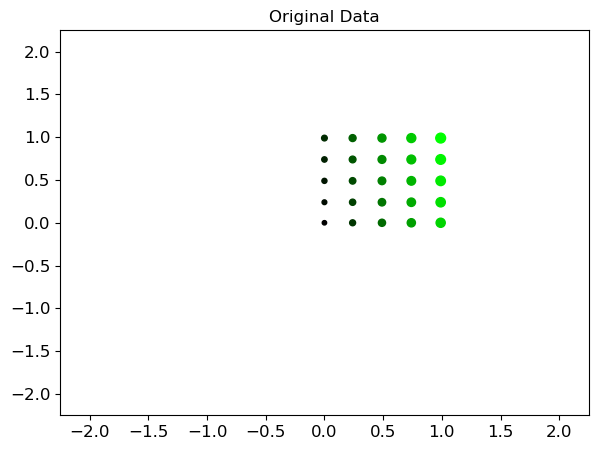

In [132]:
n_points = len(data)
colors = np.column_stack((np.zeros(n_points), np.linspace(0, 1, n_points), np.zeros(n_points)))

size = np.linspace(10, 50, n_points)
limits = [-2.25, 2.25, -2.25, 2.25]

plt.figure(figsize =(15, 5))
    
# get x and y values
x = list(data['x'])
y = list(data['y'])
    
# Create 1st subplot
plt.subplot(1, 2, 1)
# Scatter plot
plt.scatter(x, y, s = size, c = colors)
# Set title of subplot and axis labels
plt.title("Original Data")
#plt.xlabel('x')
#plt.ylabel('y')
    
# Set range of x and y axis data points
plt.xlim([limits[0], limits[1]])
plt.ylim([limits[2], limits[3]])
    
plt.show()

# Define Data Matrix and Transformation Matrices

Create a NumPy array called `X` from the `data` DataFrame above.  Further, you must define the following transformation matrices.  You must declare these matrices to be NumPy arrays, and name them A1, A2, ..., AN, as shown in the image below.

<img src="transformationMatrices.png" width ="350" />

In [133]:
# -------------------- Define X NumpPy Array -------------------- #
# Data Matrix
#X = np.array(data)
X = data.to_numpy()

# -------------------- Define 13 NumPy Arrays -------------------- #
A1 = np.array([[-1, 0],
               [0, -1]])
k = 0.5
A2 = np.array([[k, 0],
               [0, 1]])
pie4 = np.pi / 4
A3 = np.array([[np.cos(pie4), -np.sin(pie4)],
               [np.sin(pie4), np.cos(pie4)]])
A4 = np.array([[-1, 0],
               [0, 1]])
c = 2.0
A5 = np.array([[1, 0],
               [0, c]])
r = 0.5
A6 = np.array([[1, 0],
               [r, 1]])
m = 0.5
A7 = np.array([[1, m],
               [0, 1]])
A8 = np.array([[0, -1],
               [-1, 0]])
A9 = np.array([[1, 0],
               [0, 0]])
A10 = np.array([[0, 0],
                [0, 1]])
A11 = np.array([[1, 0],
                [0, -1]])
A12 = np.array([[0, 1],
                [1, 0]])
A13 = np.array([[1, 0],
                [0, 1]])

# Perform Linear Transformations and Plot Results

In this section, you will perform the following:

$$
\mathbf{X}_{trans} = \mathbf{A} \mathbf{X}^T
$$

where $\mathbf{X}$ is the data you read in from the file, $\mathbf{A}$ is any one of the thirteen transformation matrices, and $\mathbf{X}_{trans}$ is the transformed data.  You should express the matrix multiplication in one line of code! 

**Important:** When performing the matrix multiplication, please note that the order in scalar or dot product matters. A dot B is not the same as B dot A.

### Identity Matrix

Any matrix $\mathbf{A}$ multiplied by the ___Identity Matrix___ $\mathbf{I}$ is equal to itself! That is, $\mathbf{AI} = \mathbf{A}$.  The 2D identity matrix is given below. 

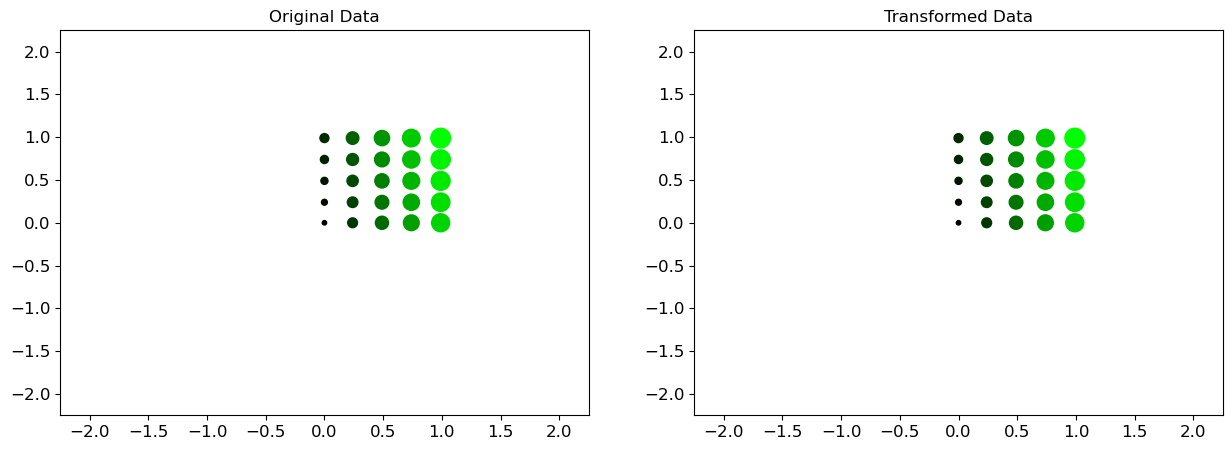

In [134]:
# Perform Matrix Multiplication
transID = np.dot(data, A13.T)
colors = np.column_stack((np.zeros(n_points), np.linspace(0, 1, n_points), np.zeros(n_points)))
size = np.linspace(10, 200, 25, endpoint = True)
limits = [-2.25, 2.25, -2.25, 2.25]

# Plot Transformation
plotTransformedData(data, transID, colors, size, limits)

For the rest of the following linear transformations, you can Google the matrix transformation definitions to learn more.
### Rotation Matrix

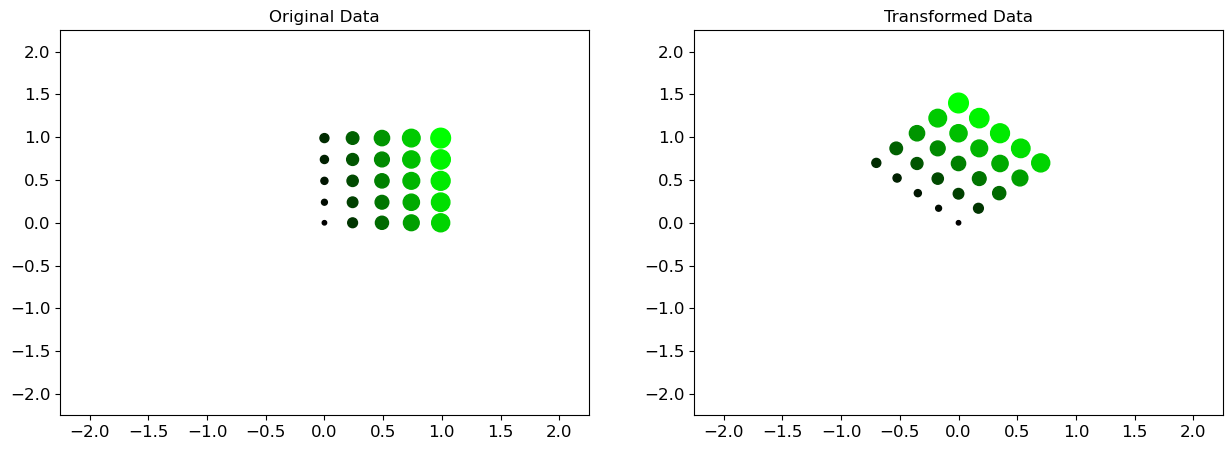

In [135]:
# Perform Matrix Multiplication
transRot = np.dot(data, A3.T)
colors = np.column_stack((np.zeros(n_points), np.linspace(0, 1, n_points), np.zeros(n_points)))
size = np.linspace(10, 200, 25, endpoint = True)
limits = [-2.25, 2.25, -2.25, 2.25]

# Plot Transformation
plotTransformedData(data, transRot, colors, size, limits)

### Reflection Matrices

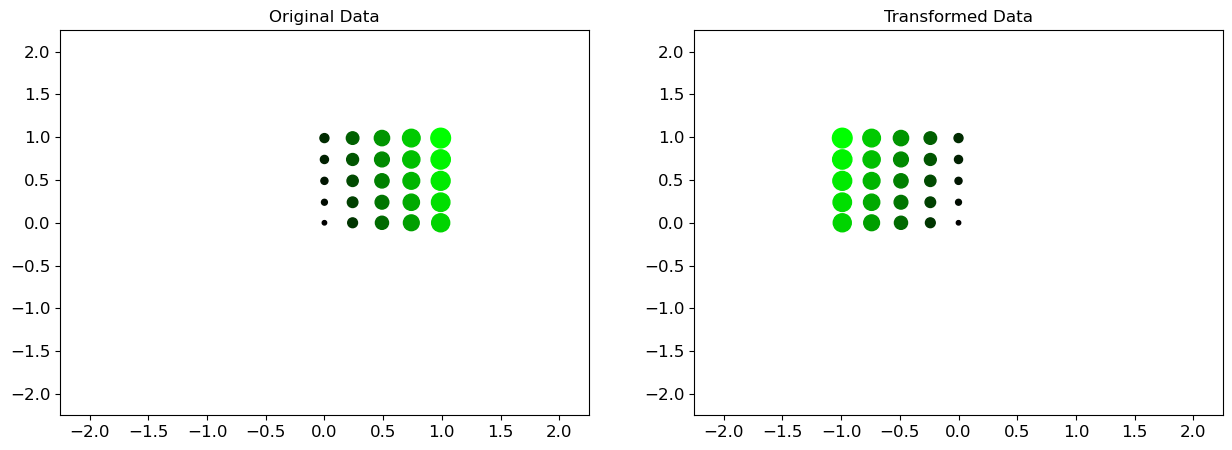

In [136]:
# Perform Matrix Multiplication: Reflection over Y-axis
transRef = np.dot(data, A4.T)
colors = np.column_stack((np.zeros(n_points), np.linspace(0, 1, n_points), np.zeros(n_points)))
size = np.linspace(10, 200, 25, endpoint = True)
limits = [-2.25, 2.25, -2.25, 2.25]

# Plot Transformation
plotTransformedData(data, transRef, colors, size, limits)

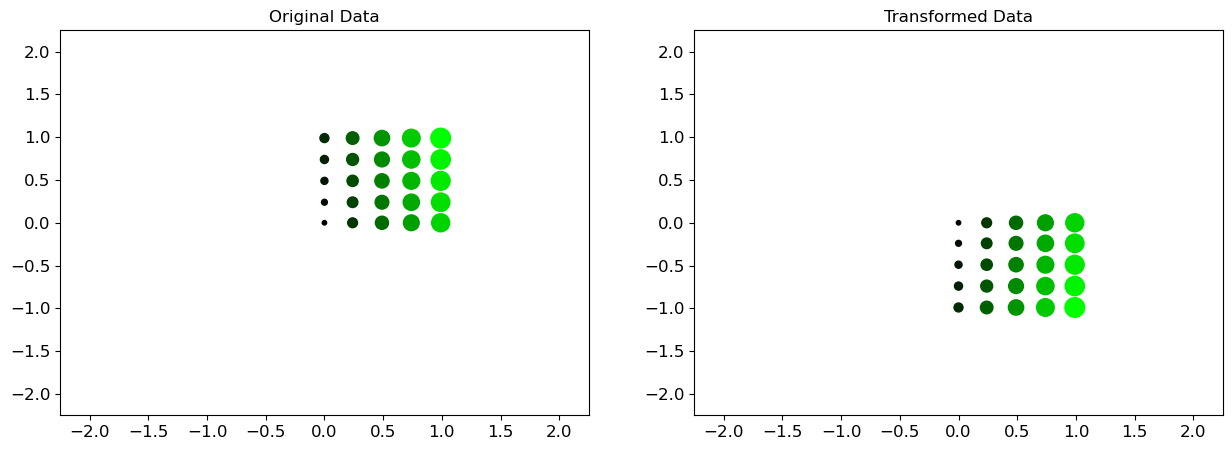

In [137]:
# Perform Matrix Multiplication: Reflection over X-axis
transRef2 = np.dot(data, A11.T)
colors = np.column_stack((np.zeros(n_points), np.linspace(0, 1, n_points), np.zeros(n_points)))
size = np.linspace(10, 200, 25, endpoint = True)
limits = [-2.25, 2.25, -2.25, 2.25]

# Plot Transformation
plotTransformedData(data, transRef2, colors, size, limits)

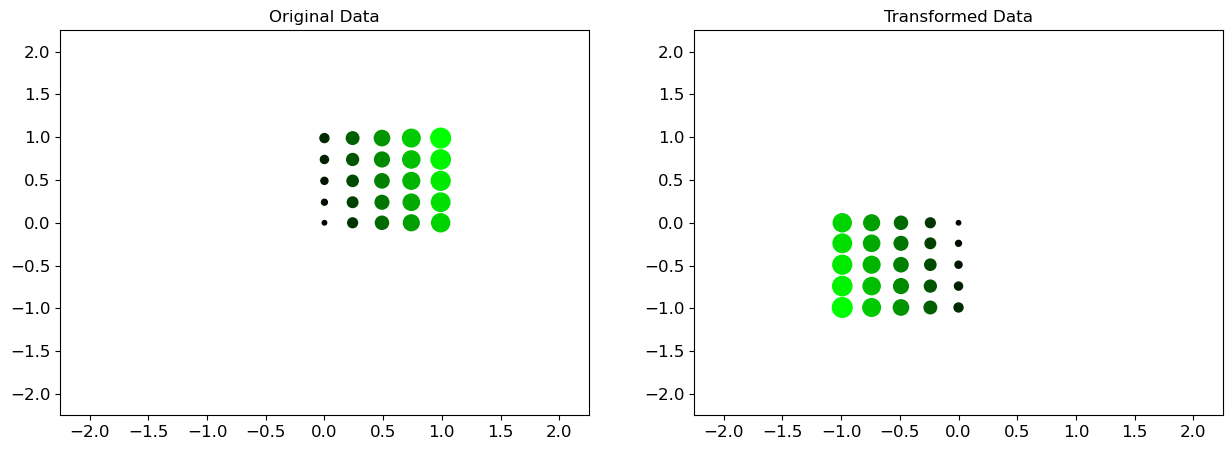

In [138]:
# Perform Matrix Multiplication: Reflection over the Origin
transRef3 = np.dot(data, A1.T)
colors = np.column_stack((np.zeros(n_points), np.linspace(0, 1, n_points), np.zeros(n_points)))
size = np.linspace(10, 200, 25, endpoint = True)
limits = [-2.25, 2.25, -2.25, 2.25]

# Plot Transformation
plotTransformedData(data, transRef3, colors, size, limits)

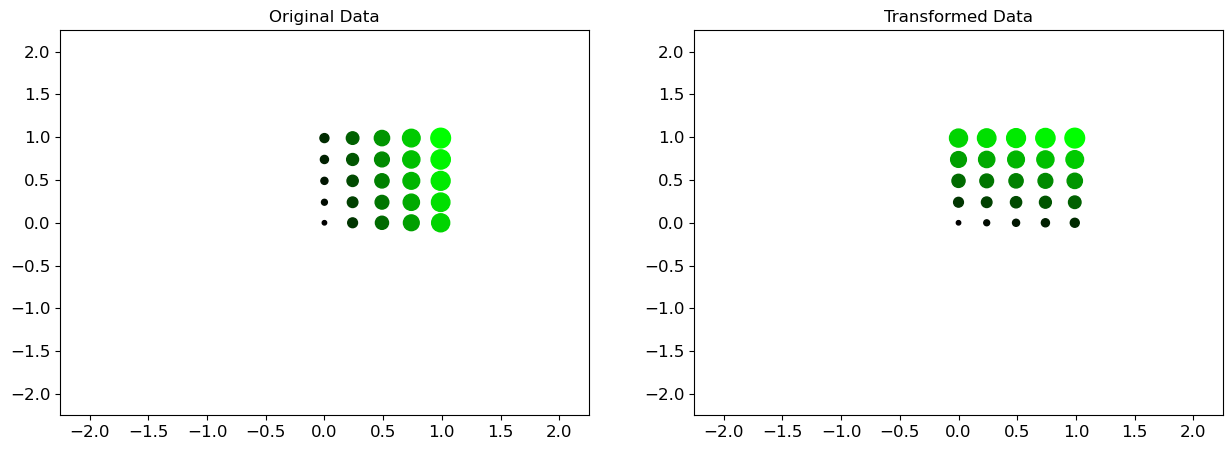

In [139]:
# Perform Matrix Multiplication: Reflection through line y = x
transRef4 = np.dot(data, A12.T)
colors = np.column_stack((np.zeros(n_points), np.linspace(0, 1, n_points), np.zeros(n_points)))
size = np.linspace(10, 200, 25, endpoint = True)
limits = [-2.25, 2.25, -2.25, 2.25]

# Plot Transformation
plotTransformedData(data, transRef4, colors, size, limits)

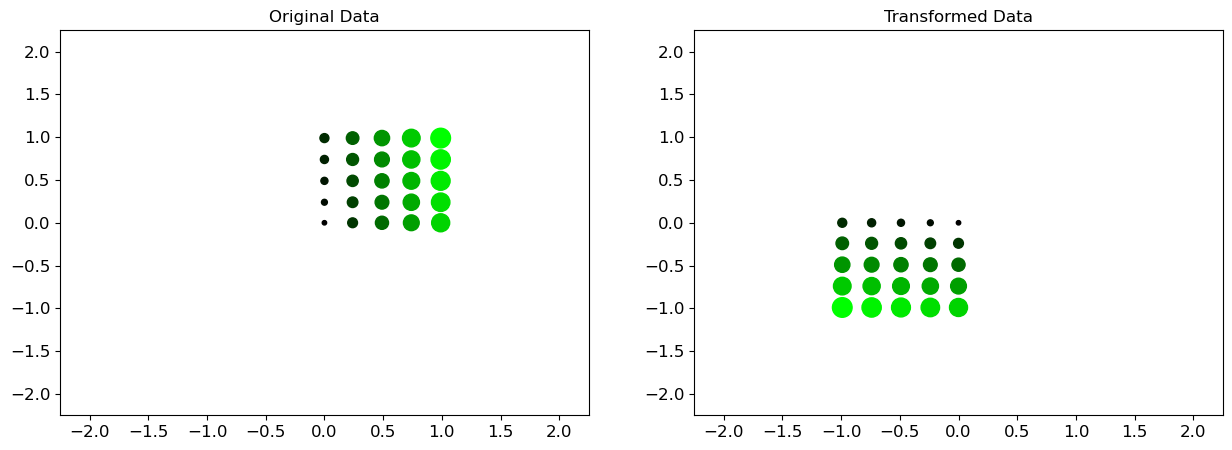

In [140]:
# Perform Matrix Multiplication: Reflection through line y = -x
transRef5 = np.dot(data, A8.T)
colors = np.column_stack((np.zeros(n_points), np.linspace(0, 1, n_points), np.zeros(n_points)))
size = np.linspace(10, 200, 25, endpoint = True)
limits = [-2.25, 2.25, -2.25, 2.25]

# Plot Transformation
plotTransformedData(data, transRef5, colors, size, limits)

### Contraction and Expansion Matrices

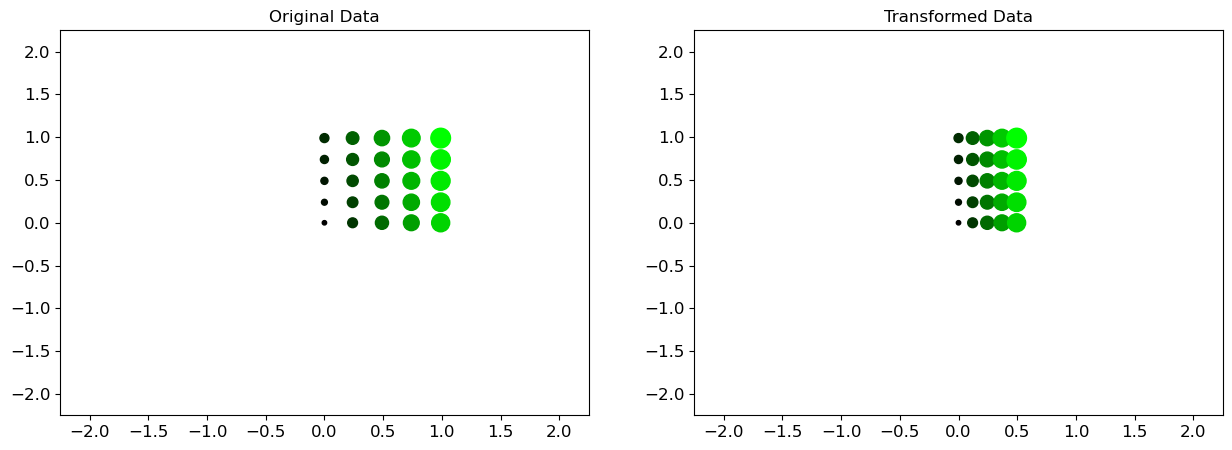

In [141]:
# Perform Matrix Multiplication: Horizontal Contraction
transCont = np.dot(data, A2.T)
colors = np.column_stack((np.zeros(n_points), np.linspace(0, 1, n_points), np.zeros(n_points)))
size = np.linspace(10, 200, 25, endpoint = True)
limits = [-2.25, 2.25, -2.25, 2.25]

# Plot Transformation
plotTransformedData(data, transCont, colors, size, limits)

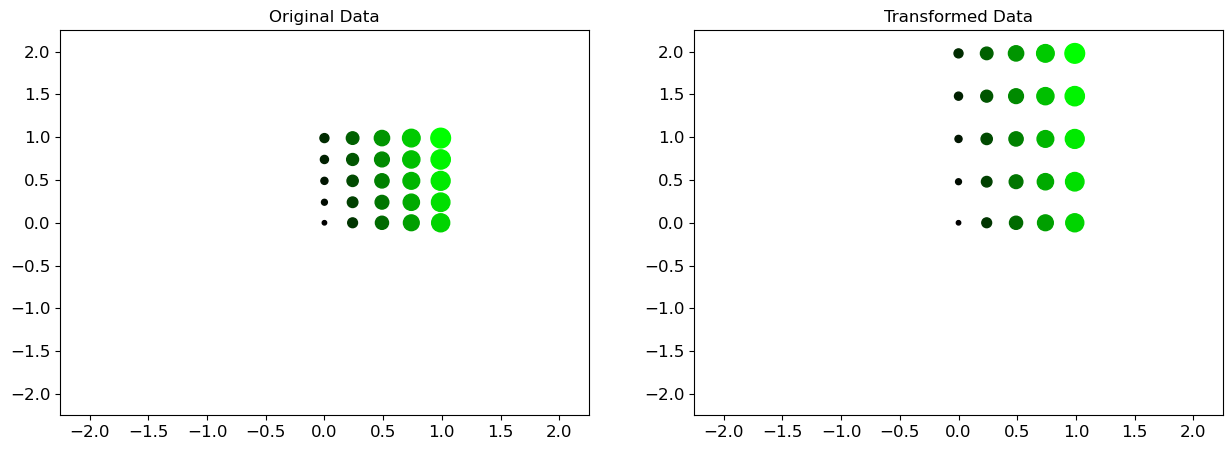

In [142]:
# Perform Matrix Multiplication: Vertical Expansion
transExp = np.dot(data, A5.T)
colors = np.column_stack((np.zeros(n_points), np.linspace(0, 1, n_points), np.zeros(n_points)))
size = np.linspace(10, 200, 25, endpoint = True)
limits = [-2.25, 2.25, -2.25, 2.25]

# Plot Transformation
plotTransformedData(data, transExp, colors, size, limits)

### Shearing Matrices

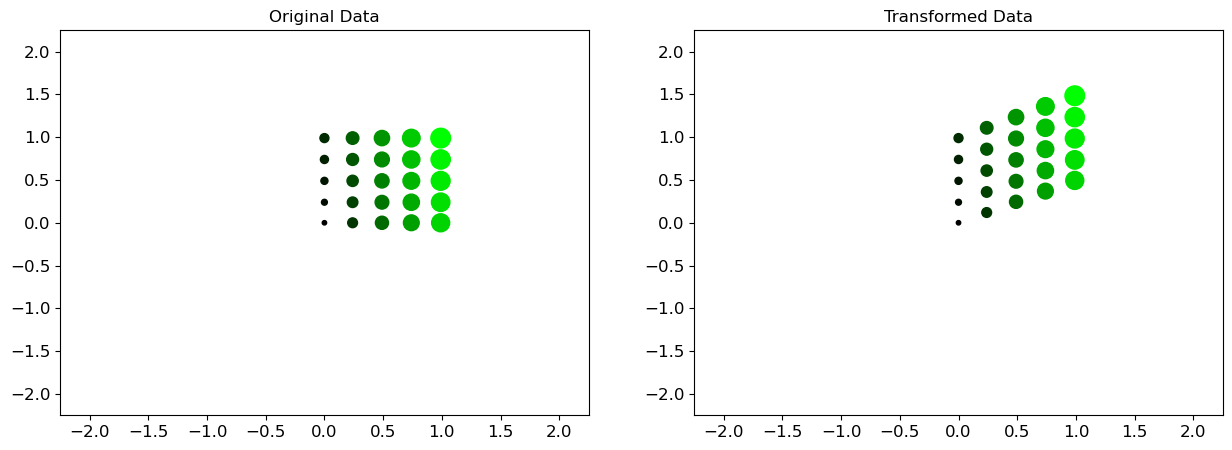

In [143]:
# Perform Matrix Multiplication: Vertical Shear Matrix
transShr = np.dot(data, A6.T)
colors = np.column_stack((np.zeros(n_points), np.linspace(0, 1, n_points), np.zeros(n_points)))
size = np.linspace(10, 200, 25, endpoint = True)
limits = [-2.25, 2.25, -2.25, 2.25]

# Plot Transformation
plotTransformedData(data, transShr, colors, size, limits)

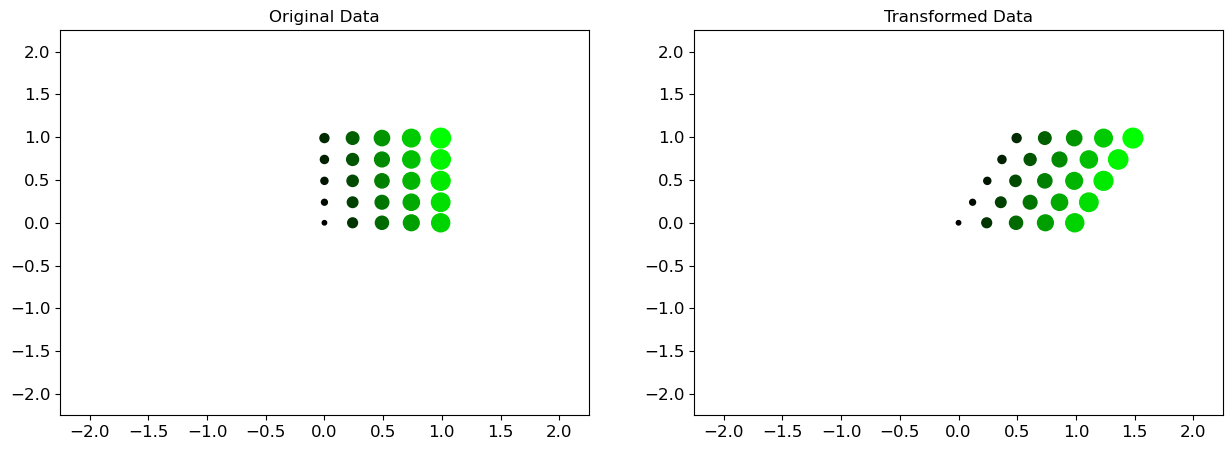

In [144]:
# Perform Matrix Multiplication: Horizontal Shear Matrix
transShr2 = np.dot(data, A7.T)
colors = np.column_stack((np.zeros(n_points), np.linspace(0, 1, n_points), np.zeros(n_points)))
size = np.linspace(10, 200, 25, endpoint = True)
limits = [-2.25, 2.25, -2.25, 2.25]

# Plot Transformation
plotTransformedData(data, transShr2, colors, size, limits)

### Projection Matrices

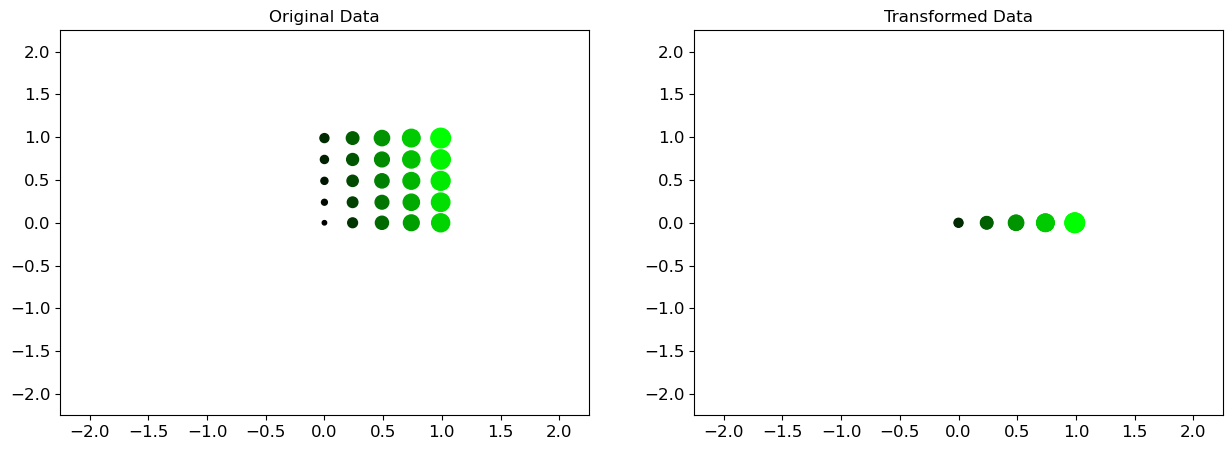

In [145]:
# Perform Matrix Multiplication: Projection over X-axis
transProj = np.dot(data, A9.T)
colors = np.column_stack((np.zeros(n_points), np.linspace(0, 1, n_points), np.zeros(n_points)))
size = np.linspace(10, 200, 25, endpoint = True)
limits = [-2.25, 2.25, -2.25, 2.25]

# Plot Transformation
plotTransformedData(data, transProj, colors, size, limits)

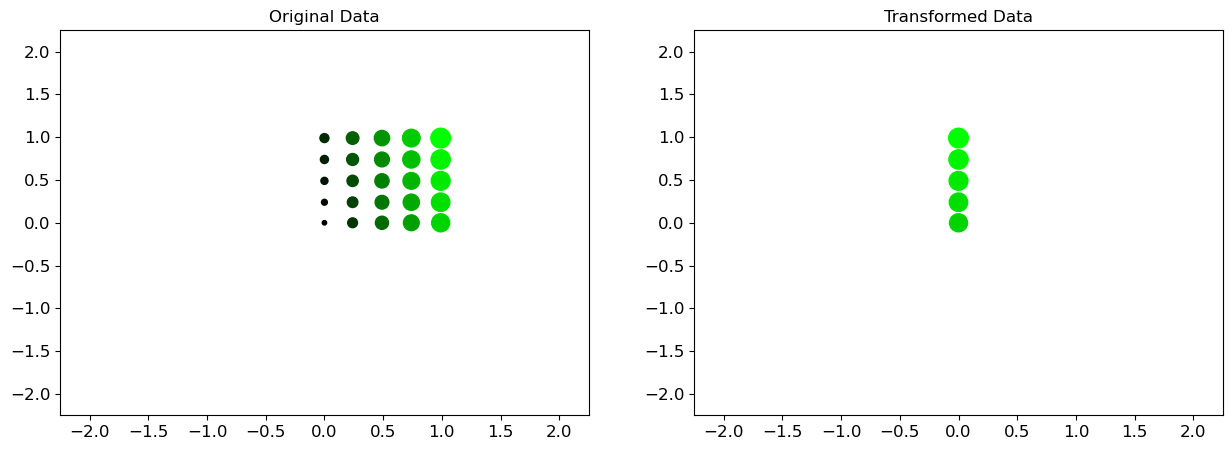

In [146]:
# Perform Matrix Multiplication
transProj2 = np.dot(data, A10.T)
colors = np.column_stack((np.zeros(n_points), np.linspace(0, 1, n_points), np.zeros(n_points)))
size = np.linspace(10, 200, 25, endpoint = True)
limits = [-2.25, 2.25, -2.25, 2.25]

# Plot Transformation
plotTransformedData(data, transProj2, colors, size, limits)

# Connect the Dots

In this section, you must correctly label linear transformations their names.  The pool of transformations is given below:

- Identity Matrix
- Rotation Matrix
- Reflection through the x Axis Matrix
- Reflection through the y Axis Matrix
- Reflection through the Line y = x Matrix
- Reflection through the Line y = -x Matrix
- Reflection through the Origin Matrix
- Horizontal Contraction/Expansion Matrix
- Vertical Contraction/Expansion Matrix
- Hortizontal Shear Matrix
- Vertical Shear Matrix
- Projection onto x Axis Matrix
- Projection onto y Axis Matrix

You must correctly label the following linear transformations with the above names.

1. A1: Reflection through the Origin Matrix
2. A2: Horizontal Contraction/Expansion Matrix
3. A3: Rotation Matrix
4. A4: Reflection through the y Axis Matrix
5. A5: Vertical Contraction/Expansion Matrix
6. A6: Vertical Shear Matrix
7. A7: Hortizontal Shear Matrix
8. A8: Reflection through the Line y = -x Matrix
9. A9: Projection onto x Axis Matrix
10. A10: Projection onto y Axis Matrix
11. A11: Reflection through the x Axis Matrix
12. A12: Reflection through the Line y = x Matrix
13. A13: Identity Matrix

